In [13]:
import tifffile
q = tifffile.imread("D:/savedStacks/2018-08-10_01-55-16/0/projections/2.tif")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20,15



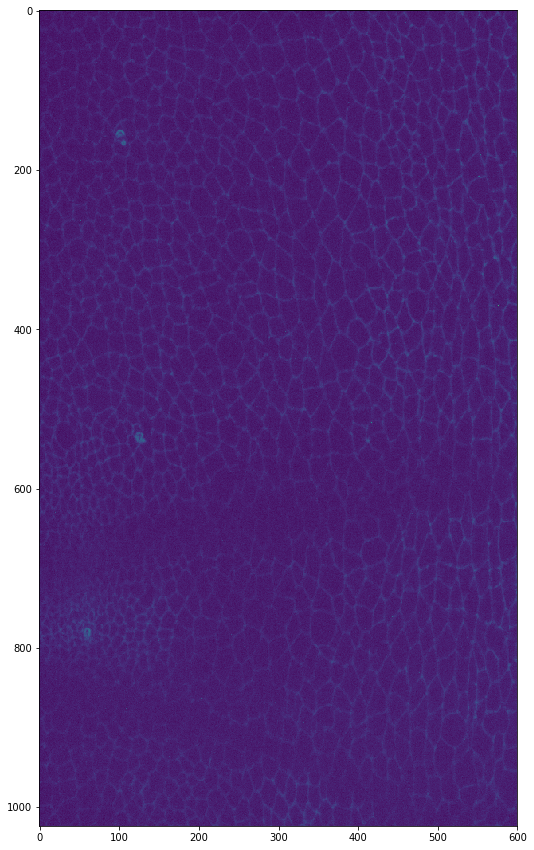

In [16]:
plt.imshow(q[:,:600])

In [ ]:
# 
import os
import shutil as sh

datasetDir = "D:\\sd_dataset_new"
if os.path.exists(datasetDir):
    sh.rmtree(datasetDir)
os.mkdir(datasetDir)
os.mkdir(datasetDir+"\\raw")
os.mkdir(datasetDir+"\\gt")

datasetName = "2018-08-10_01-55-16"
rawDataDir = "D:\\savedStacks\\" + datasetName
timeSeries = os.listdir(rawDataDir)

for t in timeSeries:
    if (t!="timelapse"):
        for i in range(9):
            raw = tifffile.imread(rawDataDir + "\\" +t+"\\"+str(i)+".tif")
            hm = tifffile.imread(rawDataDir + "\\" +t+"\\projections\\"+str(i)+"_hm.tif")
            gt = np.zeros(raw.shape)
            
            z = raw.shape[0]
            for j in range(z):
                gt[j] = (hm==j)
                tifffile.imsave(datasetDir + "\\raw\\" + datasetName + "_"+str(t)+"_"+str(i)+"_"+str(j)+"_raw.tif", raw[j].astype(np.uint16))
                tifffile.imsave(datasetDir + "\\gt\\" + datasetName + "_"+str(t)+"_"+str(i)+"_"+str(j)+"_gt.tif", gt[j].astype(np.uint16))
                
            

In [44]:
t = "0"; i = 0; j = 40
x = tifffile.imread(datasetDir + "\\raw\\" + datasetName + "_"+str(t)+"_"+str(i)+"_"+str(j)+"_raw.tif")
y = tifffile.imread(datasetDir + "\\gt\\" + datasetName + "_"+str(t)+"_"+str(i)+"_"+str(j)+"_gt.tif")

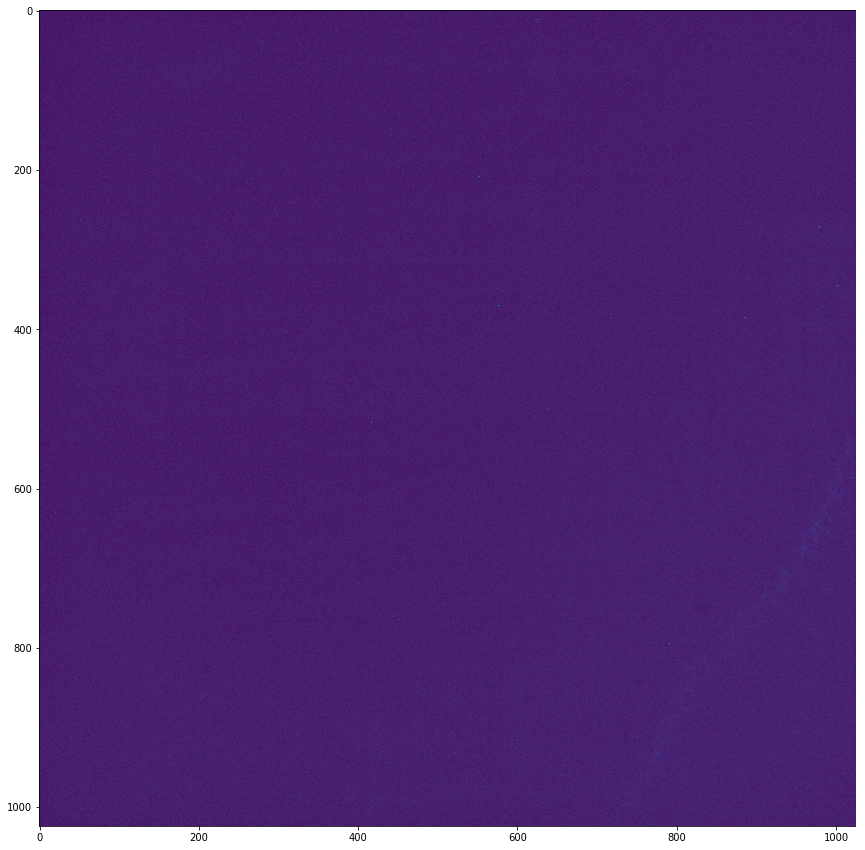

In [45]:
plt.imshow(x)

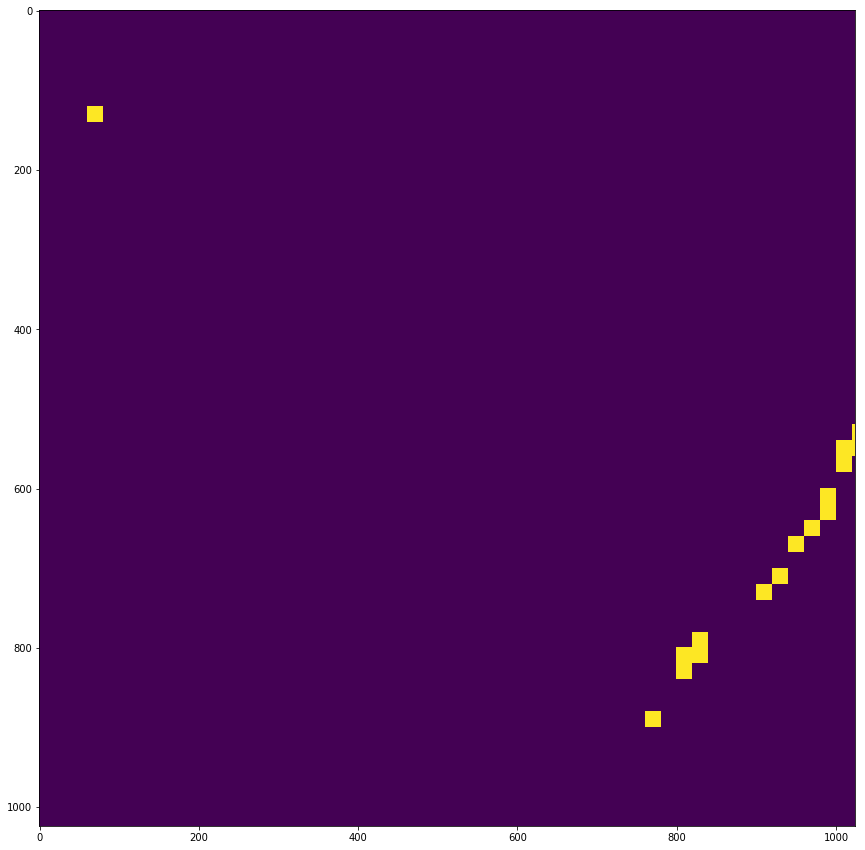

In [46]:
plt.imshow(y)